Setting up dataset for training

['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm clock', 'ceiling fan', 'photos', 'parrot', 'tail fin', 'birthday cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop sign,stopsign', 'cone', 'microwave,microwave oven', 'skateboard ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator,fridge', 'ostrich', 'bathtub', 'blinds', 'court', 'urinal', 'knee pads', 'bed', 'flamingo', 'giraffe', 'helmet', 'giraffes', 'tennis court', 'motorcycle', 'laptop', 'tea pot', 'horse', 'television,tv', 'shorts', 'manhole', 'dishwasher', 'jeans', 'sail', 'monitor', 'man', 'shirt', 'car', 'cat', 'garage door', 'bus', 'radiator', 'tights', 'sailboat,sail boat', 'racket,racquet', 'plate', 'rock wall', 'beach', 'trolley', 'ocean', 'headboard,head board', 'tea kettle', 'wetsuit', 'tennis racket,tennis racquet', 'sink', 'train', 'keyboard', 'sky', 'match', 'train station', 'stereo', 'bats', 'tennis player', 'toilet brush', 'lighter', 'pepper shaker', 'gazebo',

c:\Users\rckyd\miniconda3\envs\videollm\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


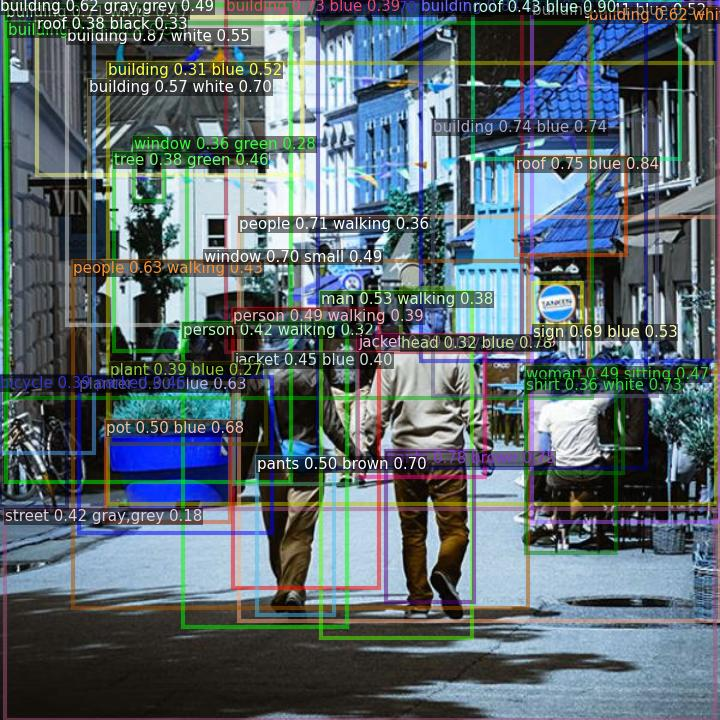

In [1]:

from torch.utils.data import DataLoader
import os
from PIL import Image
import torch

from loader import *
from frcnn_plus_vbertembedding import FRCNN_VisualBert_Embedding
model = FRCNN_VisualBert_Embedding()
model.Draw("TEST.jpg")


In [2]:
a = model.forward("TEST.jpg", "{'from': 'human', 'value': '<image>\nis the child indoors\nAnswer the question using few words or phrase.'}, {'from': 'gpt', 'value': 'yes'}")

c:\Users\rckyd\miniconda3\envs\videollm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [3]:
print(a.shape)
print(torch.cuda.is_available())

torch.Size([89, 30])
True
